In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('CLEAR_DATASET.csv')

In [3]:
del data['Unnamed: 0']
data

,rating,price,inbuilt memory,battery,display size,display hz,camera,smartphone
0,89.0,61048.89,256.0,5000.0,6.70,120.0,50.0,oneplus 11 5g
1,81.0,22187.79,128.0,5000.0,6.59,120.0,64.0,oneplus nord ce 2 lite 5g
2,75.0,18313.89,64.0,5000.0,6.60,90.0,50.0,samsung galaxy a14 5g
3,81.0,16648.89,128.0,5000.0,6.55,120.0,50.0,motorola moto g62 5g
4,82.0,27748.89,128.0,5000.0,6.70,120.0,108.0,realme 10 pro plus
...,...,...,...,...,...,...,...,...
948,83.0,38838.90,128.0,5000.0,6.67,120.0,64.0,motorola moto edge s30 pro
949,75.0,16638.90,128.0,5000.0,6.50,60.0,48.0,honor x8 5g
950,85.0,32178.90,256.0,5080.0,6.60,144.0,64.0,poco x4 gt 5g (8gb ram + 256gb)
951,80.0,22188.90,128.0,5000.0,6.80,60.0,108.0,motorola moto g91 5g


In [15]:
wcss = []
tmp = []
for col in data.columns[:-1]:
    for cluster in range(2, 9):
        model = KMeans(n_clusters=cluster)
        X = np.array(data[col]).reshape(-1, 1)
        model.fit(X)
        tmp.append(model.inertia_)
    wcss.append([col, tmp])
    tmp = []

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

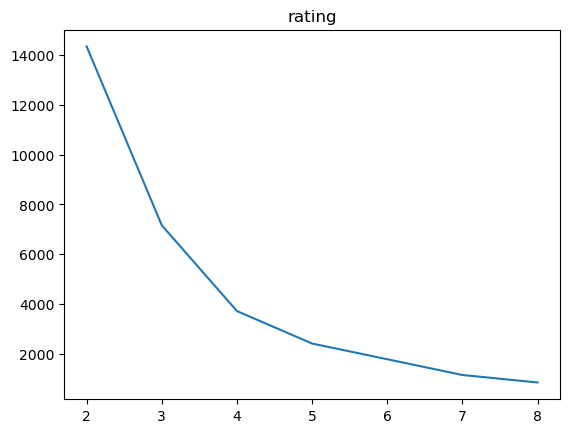

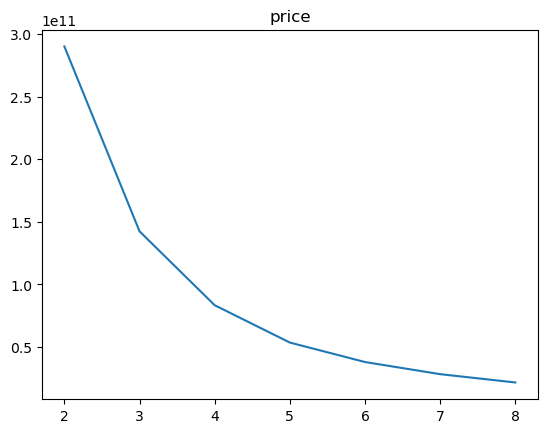

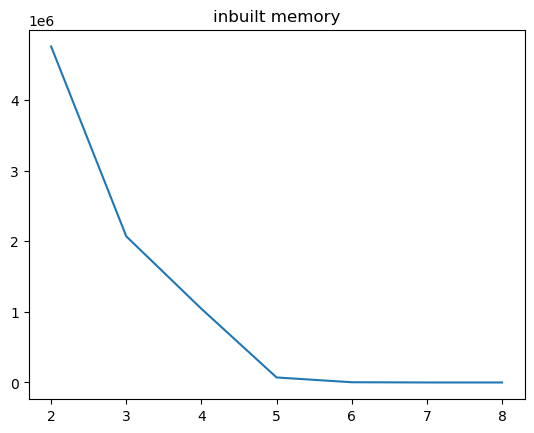

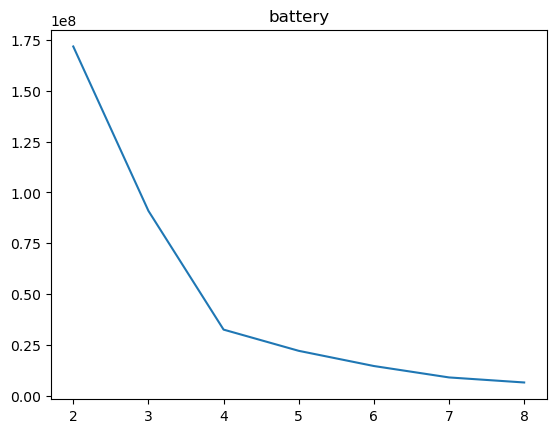

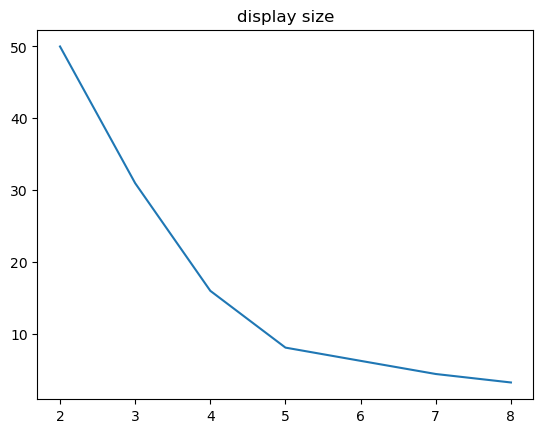

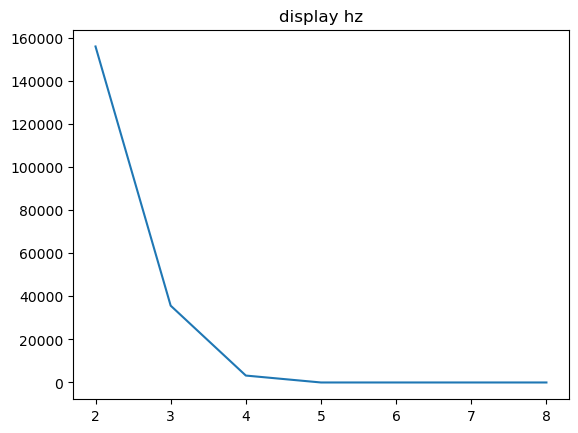

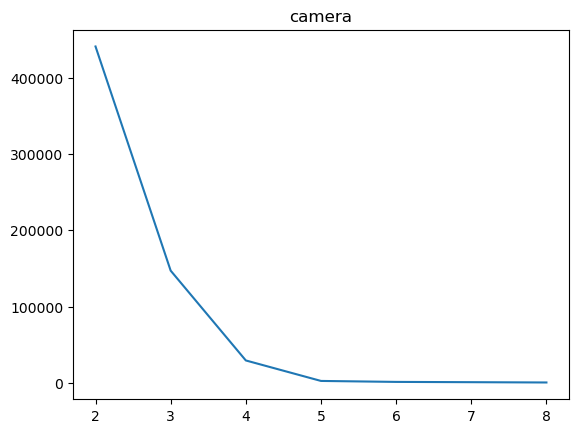

In [18]:
for elem in wcss:
    plt.title(elem[0])
    plt.plot(range(2, 9), elem[1])
    plt.show()

**Выбираем n_cluster = 5**

In [28]:
MODELS = dict()
for name in data.columns[:-1]:
    model = KMeans(n_clusters=5, random_state=42)
    X = np.array(data[name]).reshape(-1, 1)
    model.fit(X)
    MODELS[name] = model


C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [26]:
MODELS

{'rating': KMeans(n_clusters=5, random_state=42),
 'price': KMeans(n_clusters=5, random_state=42),
 'inbuilt memory': KMeans(n_clusters=5, random_state=42),
 'battery': KMeans(n_clusters=5, random_state=42),
 'display size': KMeans(n_clusters=5, random_state=42),
 'display hz': KMeans(n_clusters=5, random_state=42),
 'camera': KMeans(n_clusters=5, random_state=42)}

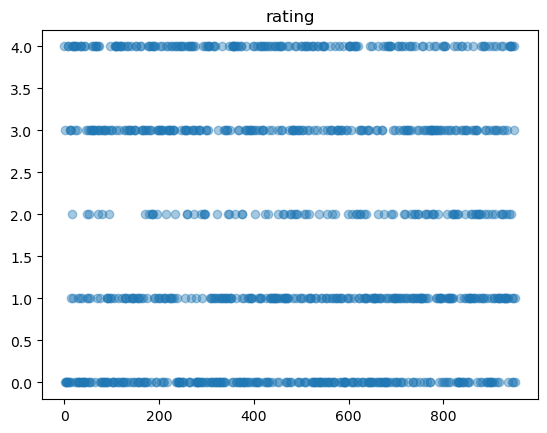

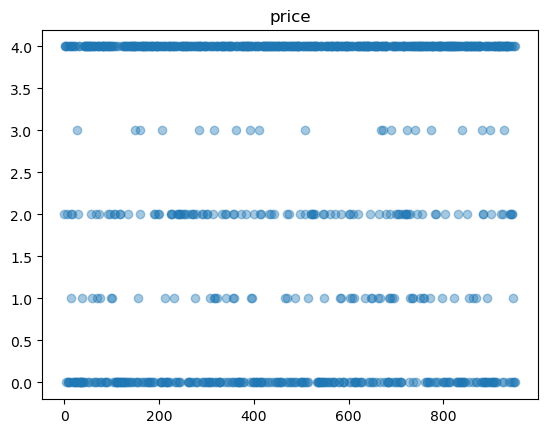

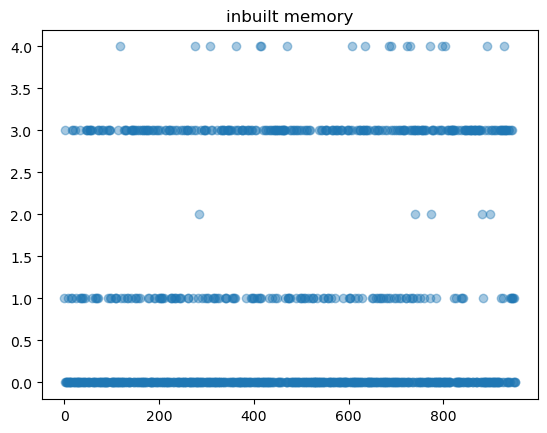

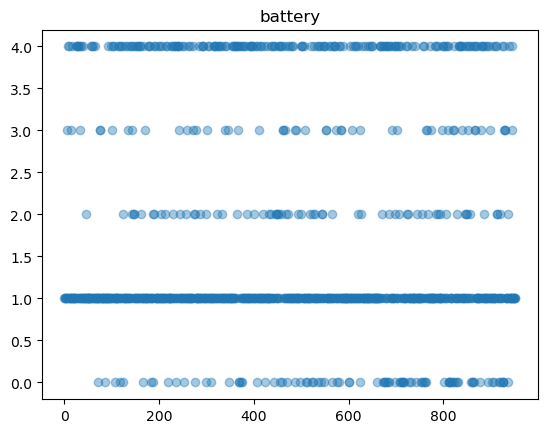

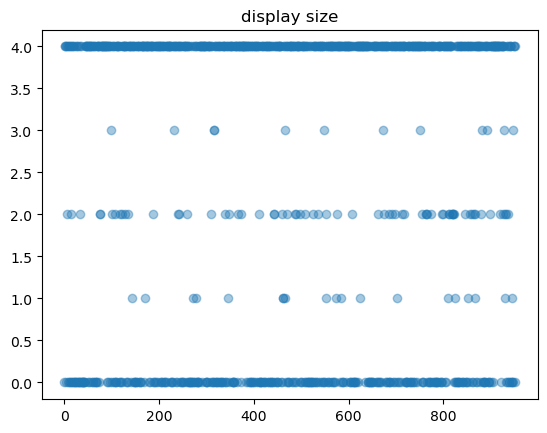

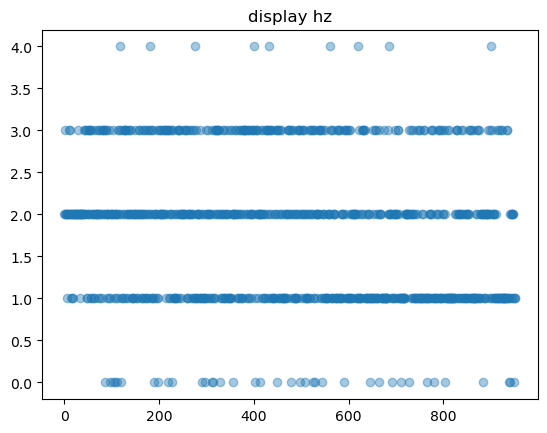

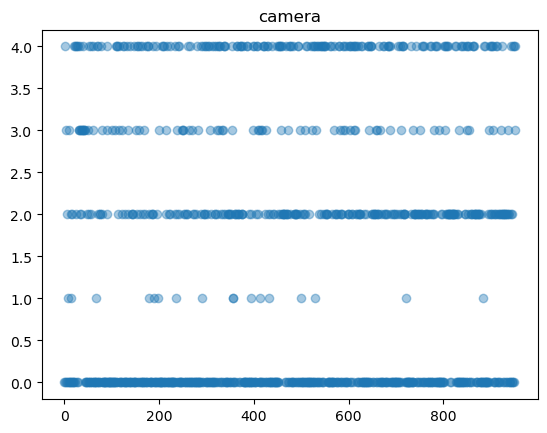

In [45]:
for name, model in MODELS.items():
    X = np.array(data[name]).reshape(-1, 1)
    plt.title(name)
    plt.scatter(range(len(data[name])), model.predict(X), alpha=0.4)
    plt.show()

In [43]:
import pickle

In [44]:
with open("models.pickle", "wb") as file:
    pickle.dump(MODELS, file)